# Part 2: Image Classification with Deep Learning (40 Points)

## 1. Load the dataset Micro-Organism Image Classification dataset from the given link: https://www.kaggle.com/datasets/mdwaquarazam/microorganism-image-classification (2 points)
## This dataset comprises 789 images of 8 different classes, 75 images per class.

In [1]:
import sys, os
import pandas as pd
from collections import defaultdict

import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import ImageFolder

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [3]:
path = "/Users/hojha/Downloads/Micro_Organism"

class_labels = sorted(list(filter(lambda x: not "DS_Store" in x, os.listdir(path))))

class_labels_dict = {}
for class_label in class_labels:
    instances = len(list(filter(lambda x: not "DS_Store" in x, os.listdir(f'{path}/{class_label}'))))
    class_labels_dict[class_label] = instances


df = pd.DataFrame(list(class_labels_dict.items()), columns=['Microorganism', 'Count'])
df.head(10)    

,Microorganism,Count
0,Amoeba,72
1,Euglena,168
2,Hydra,76
3,Paramecium,152
4,Rod_bacteria,85
5,Spherical_bacteria,86
6,Spiral_bacteria,75
7,Yeast,75


In [4]:
path = "/Users/hojha/Downloads/Micro_Organism"

transform = transforms.Compose([
    transforms.ToTensor()
])

dataset = ImageFolder(root=path, transform=transform)

In [5]:
class_names = dataset.classes
print("Number of Samples = ", len(dataset.samples))
print("classes = ", ", ".join(class_names))

Number of Samples =  789
classes =  Amoeba, Euglena, Hydra, Paramecium, Rod_bacteria, Spherical_bacteria, Spiral_bacteria, Yeast


## 2. Explain in your own words: (7 points)

* a. Gradient Descent (1 point)
* b. Drop out (1 point)
* c. Activation functions (1 point)
* d. Back Propagation (1 point)
* e. Epochs, Iterations, and Batch size (3 points)

## - Explained in the Report

# 3. Visualize/summarize the data (10 points)

## a. Number of entities in the training and testing set and number of classes in the target variable (1 point)

In [6]:
# Split the dataset into train and test sets
train_size = int(0.8 * len(dataset)) 
test_size = len(dataset) - train_size
train_data, test_data = random_split(dataset, [train_size, test_size])

In [7]:
!mkdir part2

Train Data size = 631
Test Data Size = 158
Number of Classes in the dataset = 8
classes =  Amoeba, Euglena, Hydra, Paramecium, Rod_bacteria, Spherical_bacteria, Spiral_bacteria, Yeast


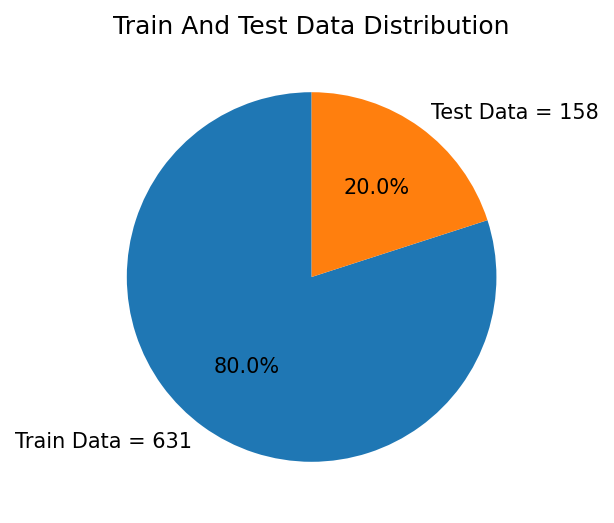

In [8]:
# Number of entities in the training and testing set and number of classes in the target variable (1 point)

print(f"Train Data size = {len(train_data)}")
print(f"Test Data Size = {len(test_data)}")
print(f"Number of Classes in the dataset = {len(dataset.classes)}")
print("classes = ", ", ".join(class_names))

# Create the pie chart
plt.figure(figsize=(4, 4), dpi=150)
plt.pie([len(train_data), len(test_data)], labels=[f"Train Data = {len(train_data)}", f"Test Data = {len(test_data)}"], autopct='%1.1f%%', startangle=90)
plt.title('Train And Test Data Distribution')
plt.savefig('part2/train_and_test_distribution.png')
plt.show()


## b. Number of pixels in the image (Height and width individually) (2 points) 

In [9]:
min_height, min_width = float('inf'), float('inf')
max_height, max_width = float('-inf'), float('-inf')
min_pixel, max_pixel = float('inf'), float('-inf')

for image, label in train_data:
    
    _, height, width = image.shape  
    min_height = min(min_height, height)
    min_width = min(min_width, width)
    max_height = max(max_height, height)
    max_width = max(max_width, width)
    min_pixel = min(min_pixel, height * width)
    max_pixel = max(max_pixel, height * width)

print(f"Minimum Height: {min_height}, Minimum Width: {min_width}")
print(f"Maximum Height: {max_height}, Maximum Width: {max_width}")
print(f"Mnimum Pixel size: {min_pixel}, Maximum Pixel size: {max_pixel}")


Minimum Height: 107, Minimum Width: 146
Maximum Height: 4701, Maximum Width: 4767
Mnimum Pixel size: 21175, Maximum Pixel size: 22005381


In [10]:
# so making the images to a standard size 

mean=[0.485, 0.456, 0.406]
std=[0.229, 0.224, 0.225]

transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize the image to 256x256
    transforms.ToTensor(),          # Convert the image to a PyTorch tensor
    transforms.Normalize(mean=mean, std=std)  # Normalize the image
])

dataset = ImageFolder(root=path, transform=transform)

image, label = dataset[0]
_, height, width = tuple(image.shape)
print("After transformation the New sizes are")

print(f"New Height: {height}")
print(f"New Height: {width}")
print(f"Number of Pixels: {height*width}")

After transformation the New sizes are
New Height: 256
New Height: 256
Number of Pixels: 65536


## c. Number of images per class (1 point)


        Microorganism  Count
0              Amoeba     72
1             Euglena    168
2               Hydra     76
3          Paramecium    152
4        Rod_bacteria     85
5  Spherical_bacteria     86
6     Spiral_bacteria     75
7               Yeast     75


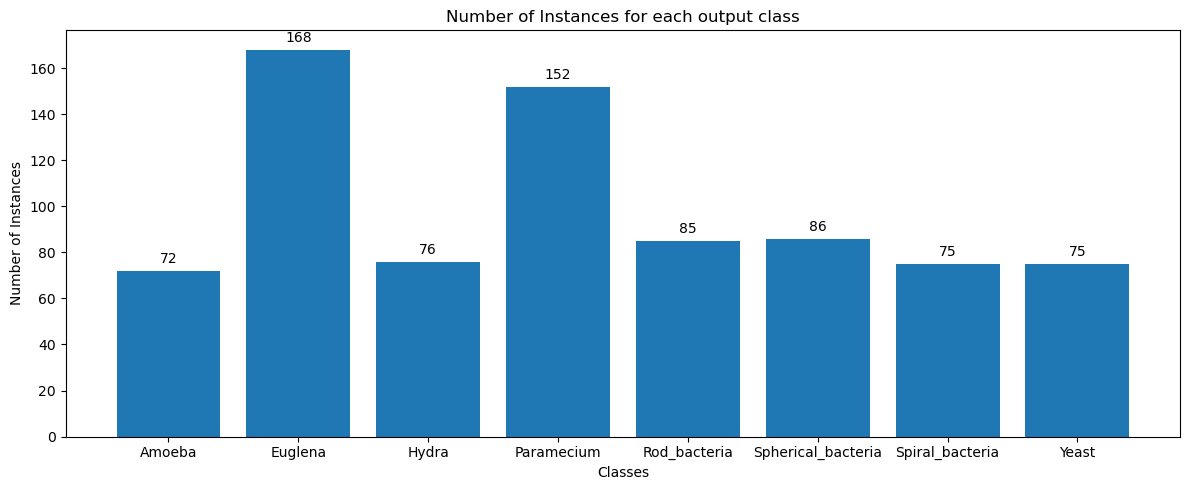

In [11]:
def show_class_distribution(dataset, plot=False, title='', starter='full_data'):
    class_counts = defaultdict(int)
    for image, label in dataset:
        class_counts[class_names[label]] += 1

    df = pd.DataFrame(list(class_counts.items()), columns=['Microorganism', 'Count'])
    print(df.head(10))

    if not plot: return
    plt.figure(figsize=(12, 5), dpi=100)
    labels = sorted(class_counts.keys())
    counts = [class_counts[k] for k in sorted(class_counts.keys())]
    plt.bar(labels, counts)
    plt.xlabel('Classes')
    plt.ylabel('Number of Instances')
    plt.title(title)
    plt.xticks(range(len(labels)), labels)
    for i, count in enumerate([class_counts[k] for k in sorted(class_counts.keys())]):
        plt.text(i, count + 2, str(count), ha='center', va='bottom', fontsize=10)
    plt.tight_layout()
    plt.savefig(f'part2/{starter}_output_classes.png')
    plt.show()


show_class_distribution(dataset, plot=True, title='Number of Instances for each output class')

## d. Display at least 2 images of each class (6 points)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

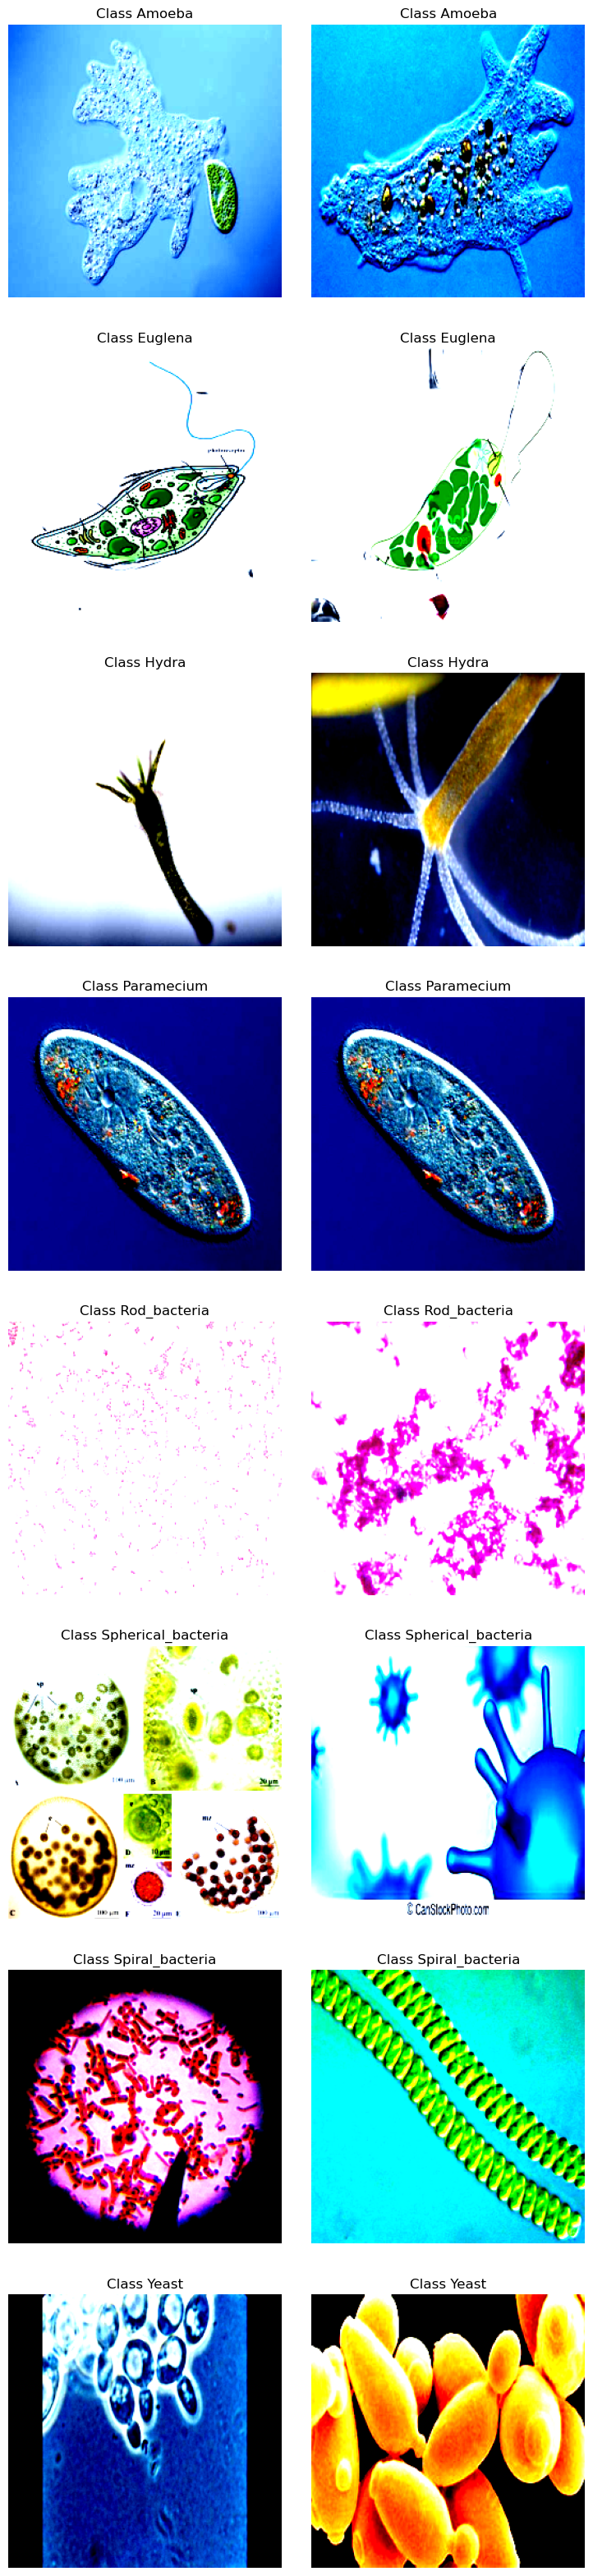

In [12]:
import random

def display_images_per_class(dataset, num_images=2):
    class_indices = defaultdict(list)
    for idx, (_, label) in enumerate(dataset):
        class_indices[label].append(idx)

    # Display at least num_images images of each class
    fig, axes = plt.subplots(len(dataset.classes), num_images, figsize=(4*num_images, 4*len(dataset.classes)), dpi=100)
    for class_label, indices in class_indices.items():
        for i, idx in enumerate(random.sample(indices,num_images)):
            image, _ = dataset[idx]
            axes[class_label, i].imshow(image.permute(1, 2, 0).numpy())
            axes[class_label, i].axis('off')
            axes[class_label, i].set_title(f"Class {class_names[class_label]}")

    plt.tight_layout(pad=3.0)
    plt.savefig("part2/sample_images.png")
    plt.show()

display_images_per_class(dataset, num_images=2)

# 4. Train a neural network (21 points)



Train data distribution => 
        Microorganism  Count
0             Euglena    140
1               Yeast     62
2          Paramecium    119
3     Spiral_bacteria     53
4  Spherical_bacteria     66
5               Hydra     62
6        Rod_bacteria     70
7              Amoeba     59


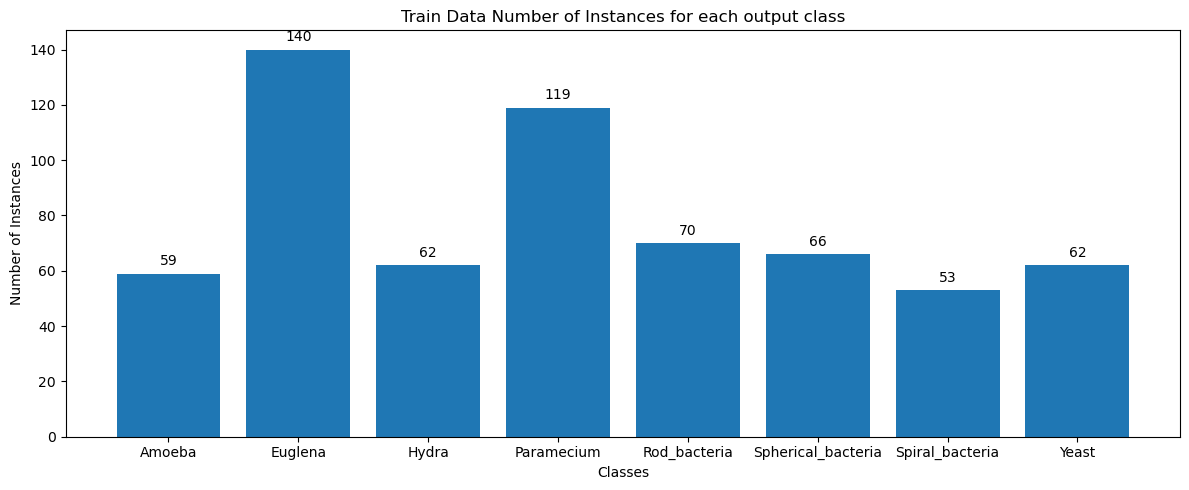


Test data distribution => 
        Microorganism  Count
0          Paramecium     33
1        Rod_bacteria     15
2               Hydra     14
3             Euglena     28
4  Spherical_bacteria     20
5              Amoeba     13
6     Spiral_bacteria     22
7               Yeast     13


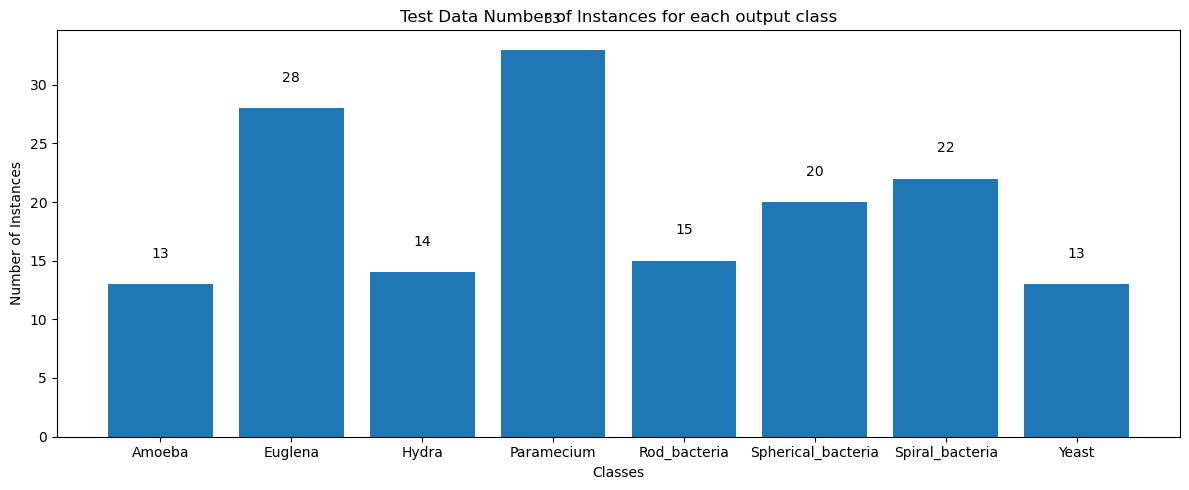

In [13]:
# Making the images to a standard size 
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize the image to 256x256
    transforms.ToTensor(),          # Convert the image to a PyTorch tensor
    transforms.Normalize(mean=mean, std=std)  # Normalize the image
])

dataset = ImageFolder(root=path, transform=transform)

train_size = int(0.8 * len(dataset))  # 80% of data for training
test_size = len(dataset) - train_size
train_data, test_data = random_split(dataset, [train_size, test_size])

batch_size = 64
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

print("\nTrain data distribution => ")
show_class_distribution(train_data, plot=True, title='Train Data Number of Instances for each output class', starter="train")
print("\nTest data distribution => ")
show_class_distribution(test_data, plot=True, title='Test Data Number of Instances for each output class', starter="test")

## a. Decide the number of layers and neurons in each layer (2 points)

In [32]:
class CNNModel(nn.Module):
    """
    Creating A simple CNN which will take sample input data size and the expected number of output classes.
    """
    def __init__(self, num_classes, img_height, img_width, dropout, activation_func):
        super(CNNModel, self).__init__()
        self.rescaling = nn.Sequential(
            nn.Conv2d(3, 3, kernel_size=1),
            nn.BatchNorm2d(3),
            nn.ReLU(inplace=True)
        )
        
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(16)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(64)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * (img_height // 8) * (img_width // 8), 256)
        self.bn4 = nn.BatchNorm1d(256)
        self.fc2 = nn.Linear(256, 128)
        self.bn5 = nn.BatchNorm1d(128)
        self.fc3 = nn.Linear(128, 64)
        self.bn6 = nn.BatchNorm1d(64)
        self.fc4 = nn.Linear(64, num_classes)
        
        self.activation_func = activation_func
        self.dropout_fuction = nn.Dropout(p=dropout)
        

    def forward(self, x):
        x = self.rescaling(x)
        x = self.pool(self.bn1(nn.functional.relu(self.conv1(x))))
        x = self.pool(self.bn2(nn.functional.relu(self.conv2(x))))
        x = self.pool(self.bn3(nn.functional.relu(self.conv3(x))))
        x = self.flatten(x)
        x = self.dropout_fuction(self.bn4(self.activation_func(self.fc1(x))))
        x = self.dropout_fuction(self.bn5(self.activation_func(self.fc2(x))))
        x = self.dropout_fuction(self.bn6(self.activation_func(self.fc3(x))))
        x = self.fc4(x)
        return x

## b. Try out different activation functions (explain each one you used) (4 points)

In [33]:
activation_functions = [nn.ReLU(), nn.Sigmoid(), nn.Softmax(), nn.Tanh()]

## c. Try with and without using dropout (4 points)


In [34]:
dropouts = [0.0, 0.2]

## d. Try different regularizations apart from dropout (4 points)


In [35]:
regularization_params = [(0.001, 0.001)]

## e. Try different optimization algorithms (such as Gradient Descent, Adam, etc.) (4 points)


In [36]:
optimizers = [optim.Adam, optim.SGD, optim.RMSprop]

In [37]:
optim.Adam.__name__

'Adam'

## f. Create a graph of f1 score vs epochs for training and validation set. (2 points) 

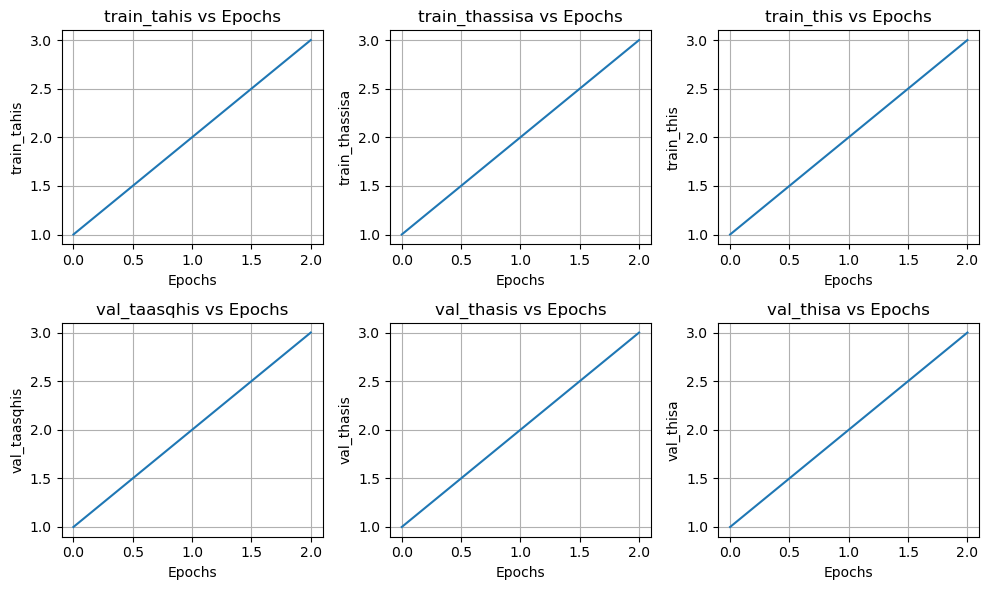

In [19]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


def plot_confusion_metrics(true_labels, predicted_labels):
    classes = [class_names[i] for i in np.unique(true_labels + predicted_labels)]
    cm = confusion_matrix(true_labels, predicted_labels, labels=classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix for Multi-Class Classification')
    plt.show()

    
def plot_training_metrics(metrics, name="training"):
    """
        Plot the traning metrics
    """
    N = len(metrics)
    fig, axs = plt.subplots((N+2)//3, 3, figsize=(10, 3*N//3))
    metrics_names = [k for k in sorted(metrics.keys())]
    for i, ax in enumerate(axs.flatten()):
        if i >= len(metrics): continue
        metric = metrics_names[i]  
        ax.plot(metrics[metric])
        ax.set_title(f'{metric} vs Epochs')
        ax.set_xlabel('Epochs')
        ax.set_ylabel(f'{metric}')
        ax.grid(True)

    plt.tight_layout()
    plt.savefig(f"part2/{name}_training.png")
    plt.show()
    
plot_training_metrics({"train_this":[1,2,3], "val_thisa":[1,2,3], "train_tahis":[1,2,3],
                      "val_thasis":[1,2,3], "train_thassisa":[1,2,3], "val_taasqhis":[1,2,3]})

In [20]:
def evaluation(model, test_data):
    """
    Evaluate the model with test data
    """
    model.eval()
    predictions, actuals = [], []
    with torch.no_grad():
        for data in test_data:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            
            actuals.extend(labels.numpy())  
            predictions.extend(predicted.numpy())
            
    # plot_confusion_metrics(actuals, predicted)
    return accuracy_score(predictions, actuals), f1_score(predictions, actuals, average='weighted')


def evaluation_metrics(model, train_loader, val_loader):
    metrics = {}
    
    trainAccuracy, train_f1 = evaluation(model, train_loader)
    metrics["train_f1_score"] = train_f1
    metrics["train_accuracy"] = trainAccuracy

    valAccuracy, val_f1 = evaluation(model, val_loader)
    metrics["val_f1_score"] = val_f1
    metrics["val_accuracy"] = valAccuracy
    
    return metrics


## g. Calculate the number of trainable parameters in your final model. (1 point)

In [38]:
model = CNNModel(8, 256, 256, 0.0, nn.ReLU())

print("layer wise parameters = \n")
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"Layer: {name:20}, Number of Parameters: {param.numel():>8}")
        
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"\n{'-'*60}\nTotal Number of trainiable Params = {total_params:>24}\n")
      

layer wise parameters = 

Layer: rescaling.0.weight  , Number of Parameters:        9
Layer: rescaling.0.bias    , Number of Parameters:        3
Layer: rescaling.1.weight  , Number of Parameters:        3
Layer: rescaling.1.bias    , Number of Parameters:        3
Layer: conv1.weight        , Number of Parameters:      432
Layer: conv1.bias          , Number of Parameters:       16
Layer: bn1.weight          , Number of Parameters:       16
Layer: bn1.bias            , Number of Parameters:       16
Layer: conv2.weight        , Number of Parameters:     4608
Layer: conv2.bias          , Number of Parameters:       32
Layer: bn2.weight          , Number of Parameters:       32
Layer: bn2.bias            , Number of Parameters:       32
Layer: conv3.weight        , Number of Parameters:    18432
Layer: conv3.bias          , Number of Parameters:       64
Layer: bn3.weight          , Number of Parameters:       64
Layer: bn3.bias            , Number of Parameters:       64
Layer: fc1.wei

## Training

Started Trianing ...
Epoch 1, train_loss=2.0773 val_loss=1.9661 train_f1_score=0.3577 train_accuracy=0.2219 val_f1_score=0.2999 val_accuracy=0.1772
Epoch 2, train_loss=1.6615 val_loss=1.9289 train_f1_score=0.3577 train_accuracy=0.2631 val_f1_score=0.3014 val_accuracy=0.2152
Epoch 3, train_loss=1.4301 val_loss=1.9240 train_f1_score=0.3635 train_accuracy=0.2995 val_f1_score=0.2622 val_accuracy=0.1962
Epoch 4, train_loss=1.1980 val_loss=1.9265 train_f1_score=0.5179 train_accuracy=0.5024 val_f1_score=0.3206 val_accuracy=0.2975
Epoch 5, train_loss=0.9331 val_loss=1.9652 train_f1_score=0.7070 train_accuracy=0.7005 val_f1_score=0.3393 val_accuracy=0.3101
Epoch 6, train_loss=0.7098 val_loss=2.0450 train_f1_score=0.8842 train_accuracy=0.8843 val_f1_score=0.2984 val_accuracy=0.2911
Epoch 7, train_loss=0.5215 val_loss=2.0957 train_f1_score=0.9174 train_accuracy=0.9176 val_f1_score=0.3406 val_accuracy=0.3165
Epoch 8, train_loss=0.4092 val_loss=2.2053 train_f1_score=0.9477 train_accuracy=0.9477 val

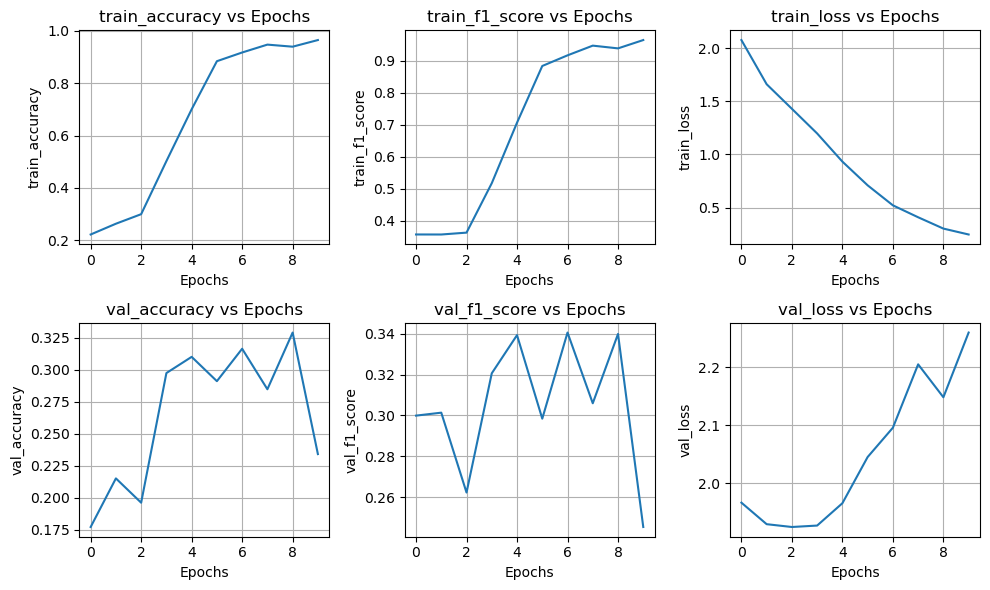

Finished Training with metrics = train_loss=0.2470 val_loss=2.2603 train_f1_score=0.9652 train_accuracy=0.9651 val_f1_score=0.2453 val_accuracy=0.2342


In [40]:
def training(train_loader, val_loader, num_epochs, model, 
             criterion, optimizer, name="training", verbose=0, plots=True):
    """
    This method will train the tensorflow Neural Network Model
    It takes the parameters like -
        train_loader = training data
        model = base model
        epocs  = number of iteration the moedls will be trained
        optmizer =  'adam' or 'SGD'
        criterion = which used to evaluate the model
        verbose = to control logs
    """
    print("Started Trianing ...")
    metrics = {"train_loss": [], "val_loss":[]}
    
    for epoch in range(num_epochs):
        model.train()
        epoch_loss, epoch_accuracy, running_loss = 0, 0, 0.0
        train_prediction, train_lables = [], []
        
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            
            # forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)
    
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            epoch_loss += loss.item()
            running_loss += loss.item()
                        
            if verbose == 0 and i % 100 == 99:  # print every 100 mini-batches
                print(f'\tEpoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / len(train_loader)}')
                running_loss = 0.0
            
        metrics["train_loss"].append(epoch_loss/ len(train_loader))
        metrics["val_loss"].append(sum([criterion(model(inputs), labels).item() for inputs, labels in val_loader])/len(val_loader))
        
        
        for k, v in evaluation_metrics(model, train_loader, val_loader).items():
            if k not in metrics: metrics[k] = []
            metrics[k].append(v)
            
        if verbose: print(f"Epoch {epoch + 1}, {' '.join([f'{k}={v[-1]:.4f}' for k, v in metrics.items()])}")

    if plots: plot_training_metrics(metrics, name) 
        
    print(f"Finished Training with metrics = {' '.join([f'{k}={v[-1]:.4f}' for k, v in metrics.items()])}")
    return model, metrics


# # for quick testing
model = CNNModel(8, 256, 256, 0.0, nn.ReLU()).to(device)
model, metrics = training(train_loader = train_loader,
                          val_loader = test_loader,
                          num_epochs = 10,
                          model = model,
                          criterion = nn.CrossEntropyLoss(),
                          optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.001),
                          name="quick_test",
                          verbose = 1)

In [31]:
loss_functions = [ nn.CrossEntropyLoss()]#, nn.MSELoss()]
result = {"optimizer":[], "loss": [], "dropout":[], "activation": [],
          "train_loss": [], "train_f1_score": [], "train_accuracy": [], "val_loss": [],
          "val_f1_score": [], "val_accuracy": [], "name": [], "regularization": []}

for activation_function in activation_functions:
    for dropout in dropouts:
        for (lr, weight_decay) in regularization_params:
            for optimizer in optimizers:
                for loss_function in loss_functions:
                    result["activation"].append(activation_function.__class__.__name__)
                    result["dropout"].append(dropout)
                    result["regularization"].append(f"[lr={lr},wd={weight_decay}]")
                    result["optimizer"].append(optimizer.__name__)
                    result["loss"].append(loss_function.__class__.__name__)
                    name = []
                    for key in ["optimizer", "loss", "activation", "dropout"]:
                        name.append(f'{key}={result[key][-1]}')

                    result["name"].append(",".join(name))
                    print(name)

                    print(f'''\n\tTraining {result["name"][-1]}''')

                    model = CNNModel(8, 256, 256, dropout, activation_function)
                    optimizer_val = optimizer(model.parameters(), lr=lr, weight_decay=weight_decay)
                    model, metrics = training(train_loader = train_loader,
                                              val_loader = test_loader,
                                              num_epochs = 30,
                                              model = model,
                                              criterion = nn.CrossEntropyLoss(),
                                              optimizer = optimizer_val,
                                              name = name,
                                              verbose = 1)

                    result["train_loss"].append(metrics["train_loss"][-1])
                    result["train_accuracy"].append(metrics["train_loss"][-1])
                    result["train_f1_score"].append(metrics["train_f1_score"][-1])
                    result["val_loss"].append(metrics["val_loss"][-1])
                    result["val_f1_score"].append(metrics["val_f1_score"][-1])
                    result["val_accuracy"].append(metrics["val_accuracy"][-1])
                    

['optimizer=Adam', 'loss=CrossEntropyLoss', 'activation=ReLU', 'dropout=0.0']

	Training optimizer=Adam,loss=CrossEntropyLoss,activation=ReLU,dropout=0.0
Started Trianing ...


KeyboardInterrupt: 

In [ ]:
result_df = pd.DataFrame(result)
result_df

In [ ]:
"""
Sort DataFrame by Test_Accuracy in increasing order and plot it for different models
"""

df_sorted = result_df.sort_values(by='val_accuracy')

plt.figure(figsize=(12, 1*len(result["optimizer"])))
bars = plt.barh(df_sorted['name'], df_sorted['val_accuracy'], color='skyblue')
for bar in bars:
#     plt.text(0, (bar.get_y() + bar.get_height()/2), f'{bar.get_width():.2f}',
#              va='center', ha='left', fontsize=10)
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}',
             va='center', ha='left', fontsize=10)
plt.xlabel('Test Accuracy')
plt.ylabel('Model Name')
plt.title('Test Accuracy of Models')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()